Importing Libraries

In [5]:
import requests
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

Fetching Data

In [2]:
# Specify the path to the CSV file
csv_filename = "/Users/nikolausschultze/Documents/GitHub/CS579Project2/Taxi_Trips__2013-2023__20240413.csv"

# Read data from the CSV file
data = []
with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

Displaying the Data

In [3]:
for row in data[:10]:
    print(row)

{'Trip ID': '3c89f4295c2e79b71b3ddcbeaabbe3f28c3fe3e6', 'Taxi ID': 'd1a7c7e8e9cf388f9923e529d82166c5a3baf4262ec9145752b28ddfec91d431d5e9d3d727fb78e595ca209548142c44d6b250817b4eff5676a05eec87d4227f', 'Trip Start Timestamp': '02/25/2015 08:45:00 PM', 'Trip End Timestamp': '02/25/2015 08:45:00 PM', 'Trip Seconds': '0', 'Trip Miles': '0', 'Pickup Census Tract': '17031030500', 'Dropoff Census Tract': '17031030500', 'Pickup Community Area': '77', 'Dropoff Community Area': '77', 'Fare': '3.25', 'Tips': '0.00', 'Tolls': '0.00', 'Extras': '0.00', 'Trip Total': '3.25', 'Payment Type': 'Cash', 'Company': 'Choice Taxi Association', 'Pickup Centroid Latitude': '41.987225558', 'Pickup Centroid Longitude': '-87.664937724', 'Pickup Centroid Location': 'POINT (-87.6649377243 41.9872255578)', 'Dropoff Centroid Latitude': '41.987225558', 'Dropoff Centroid Longitude': '-87.664937724', 'Dropoff Centroid  Location': 'POINT (-87.6649377243 41.9872255578)'}
{'Trip ID': '05a9ede308ee48b455861e42a03f077da538094

Sorting the Data by Month

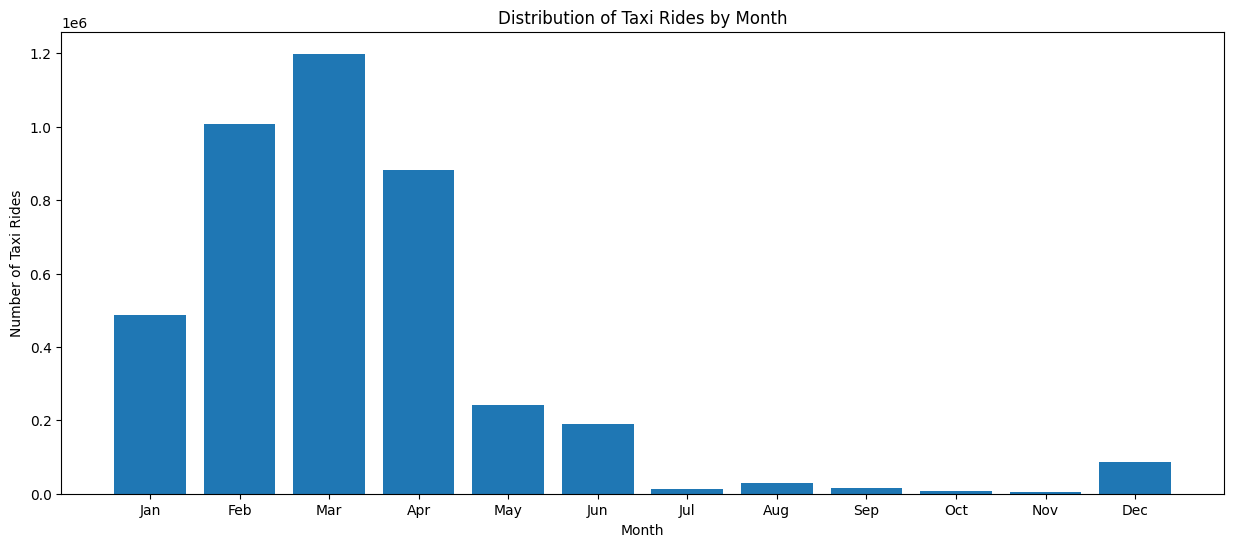

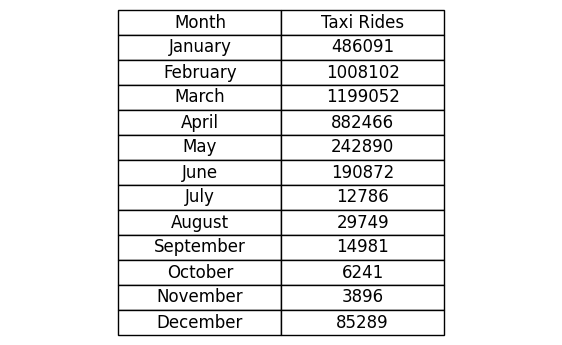

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

if data:
    # Initialize a defaultdict to count taxi rides by month
    month_counts = defaultdict(int)
    
    # Extract month from trip_start_timestamp for each record and count occurrences
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            month = start_date.month
            month_counts[month] += 1

    # Ensure counts for all months are included
    for month in range(1, 13):
        if month not in month_counts:
            month_counts[month] = 0

    # Sort the months chronologically
    sorted_months = sorted(month_counts.keys())
    
    # Plot the bar graph
    plt.figure(figsize=(15, 6))
    plt.bar(sorted_months, [month_counts[month] for month in sorted_months])
    plt.xlabel("Month")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Month")
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Display the bar graph
    plt.show()
    
    # Create and display the table
    table_data = [['Month', 'Taxi Rides']]
    for month in sorted_months:
        table_data.append([datetime.strptime(str(month), "%m").strftime("%B"), month_counts[month]])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting the Data by Season

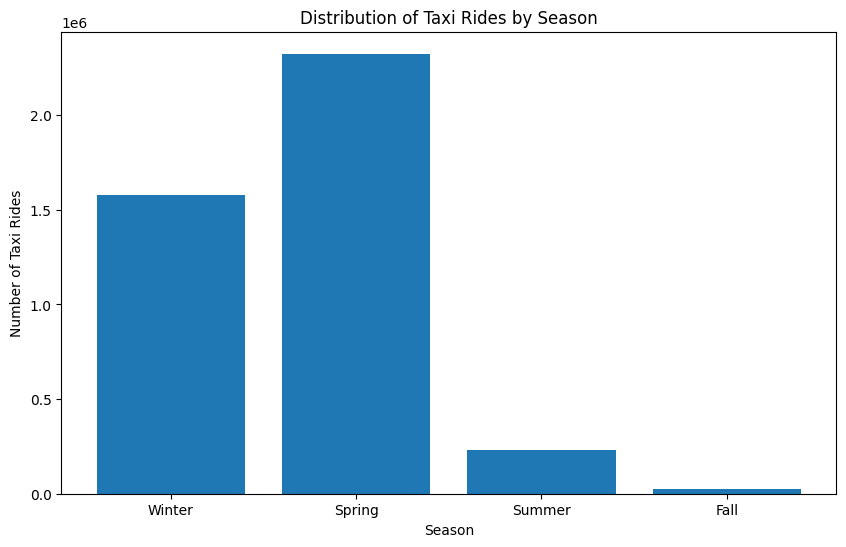

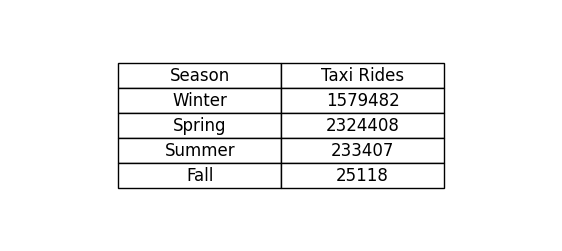

In [8]:
if data:
    # Initialize a defaultdict to count taxi rides by season
    season_counts = defaultdict(int)
    
    # Map each month to its corresponding season
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }
    
    # Extract month from trip_start_timestamp for each record and count occurrences by season
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            month = start_date.month
            season = month_to_season[month]
            season_counts[season] += 1

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(season_counts.keys(), season_counts.values())
    plt.xlabel("Season")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Season")
    plt.show()
    
    # Create and display the table
    table_data = [['Season', 'Taxi Rides']]
    for season, count in season_counts.items():
        table_data.append([season, count])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting the Data by Year

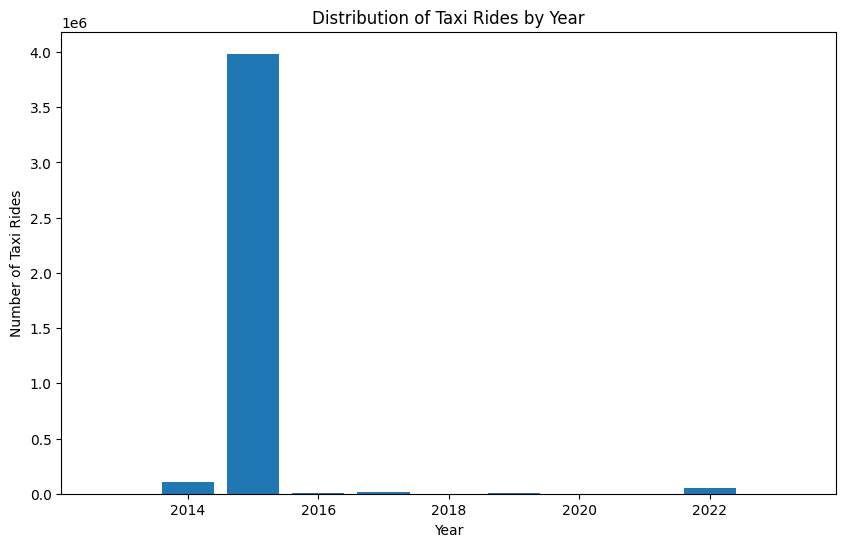

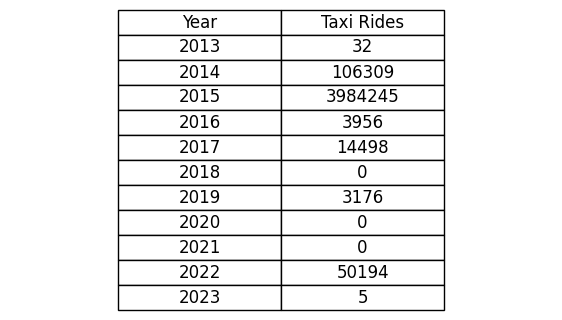

In [23]:
if data:
    # Extract year from trip_start_timestamp for each record and count occurrences by year
    year_counts = defaultdict(int)
    all_years = range(2013, 2024)  # Define the range of years you want to consider
    
    for record in data:
        start_timestamp = record.get("Trip Start Timestamp", "")
        if start_timestamp:
            start_date = datetime.strptime(start_timestamp, "%m/%d/%Y %I:%M:%S %p")
            year = start_date.year
            year_counts[year] += 1

    # Ensure all years are included in the counts
    for year in all_years:
        year_counts[year] = year_counts.get(year, 0)

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(year_counts.keys(), year_counts.values())
    plt.xlabel("Year")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Year")
    plt.show()
    
    # Create and display the table
    table_data = [['Year', 'Taxi Rides']]
    for year in sorted(all_years):
        table_data.append([year, year_counts[year]])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Trip Length by Miles

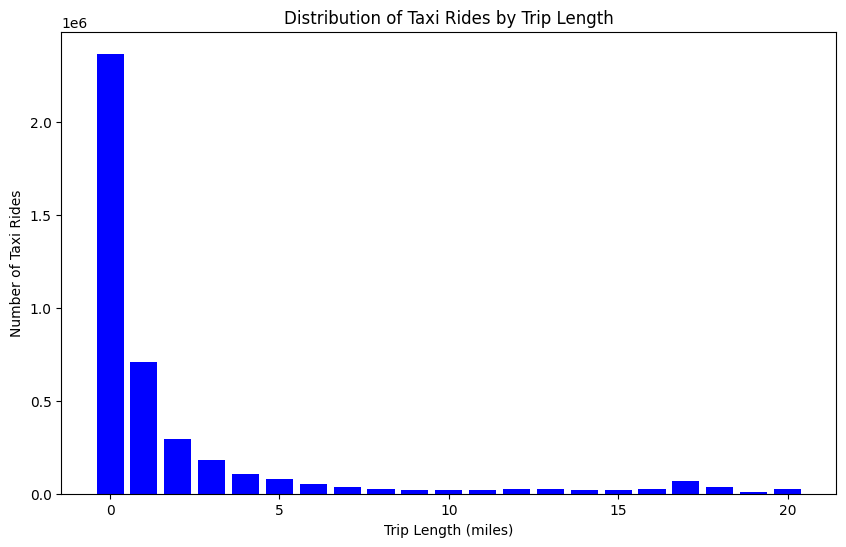

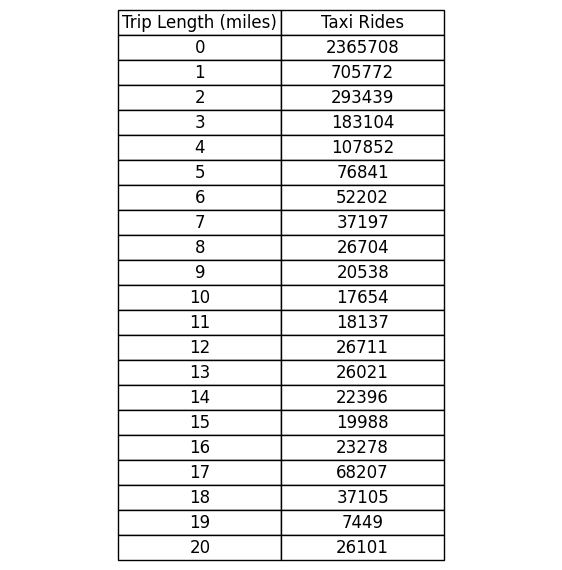

In [10]:
if data:
    # Calculate trip lengths and count the number of taxi rides for each trip length interval
    trip_length_counts = {}
    for record in data:
        trip_miles = record.get("Trip Miles", None)
        
        # Check if trip miles is not empty and is a valid number
        if trip_miles is not None and trip_miles.replace('.', '', 1).isdigit():
            try:
                trip_length = min(float(trip_miles), 20)  # Convert trip miles to float and limit to maximum 20
                
                # Define trip length intervals (e.g., every 1 mile)
                interval = 1
                trip_length_interval = int(trip_length / interval) * interval
                
                # Handle trips over 20 miles
                if trip_length > 20:
                    trip_length_interval = "20+"
                
                # Accumulate counts within each trip length interval
                trip_length_counts[trip_length_interval] = trip_length_counts.get(trip_length_interval, 0) + 1
            except ValueError:
                # Handle any parsing errors
                print("Error parsing trip miles for record:", record)
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(trip_length_counts.keys(), trip_length_counts.values(), width=0.8, color='blue')  # Adjust width and color as needed
    plt.xlabel("Trip Length (miles)")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Trip Length")
    plt.show()
    
    # Create and display the table
    table_data = [['Trip Length (miles)', 'Taxi Rides']]
    for trip_length, count in sorted(trip_length_counts.items()):
        table_data.append([trip_length, count])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Trip Start Time

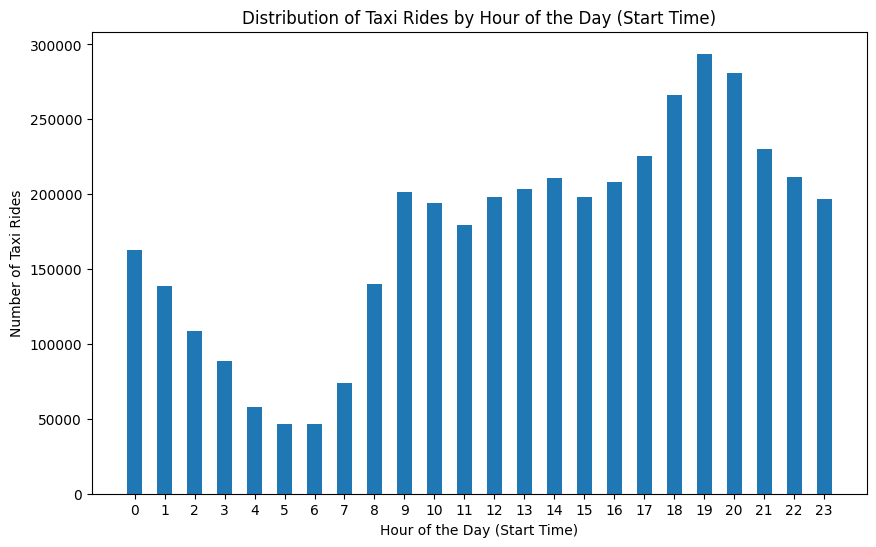

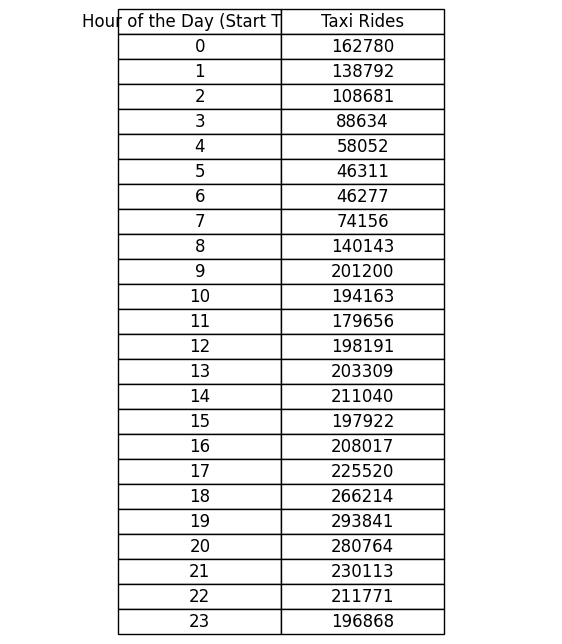

In [11]:
# Filter out records with missing or invalid trip start timestamp
data = [record for record in data if record.get("Trip Start Timestamp")]

if data:
    # Sort the data by the trip start timestamp
    data.sort(key=lambda x: datetime.strptime(x["Trip Start Timestamp"], "%m/%d/%Y %I:%M:%S %p"))
    
    # Count the number of taxi rides for each trip start hour
    trip_start_hour_counts = {}
    for record in data:
        trip_start_time = datetime.strptime(record["Trip Start Timestamp"], "%m/%d/%Y %I:%M:%S %p")
        trip_start_hour = trip_start_time.hour
        trip_start_hour_counts[trip_start_hour] = trip_start_hour_counts.get(trip_start_hour, 0) + 1
    
    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(trip_start_hour_counts.keys(), trip_start_hour_counts.values(), width=0.5)
    plt.xlabel("Hour of the Day (Start Time)")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Hour of the Day (Start Time)")
    plt.xticks(range(24))
    plt.show()
    
    # Create and display the table
    table_data = [['Hour of the Day (Start Time)', 'Taxi Rides']]
    for hour, count in sorted(trip_start_hour_counts.items()):
        table_data.append([hour, count])
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Sports Seasons

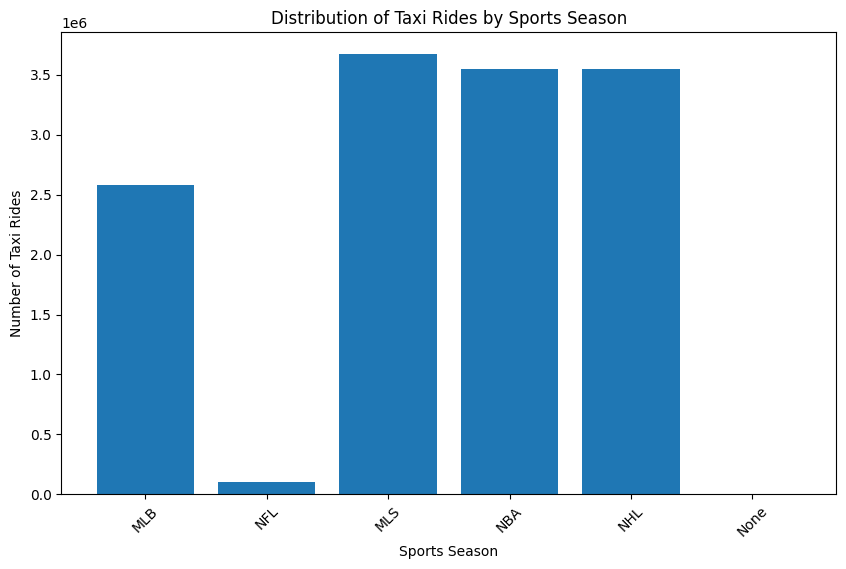

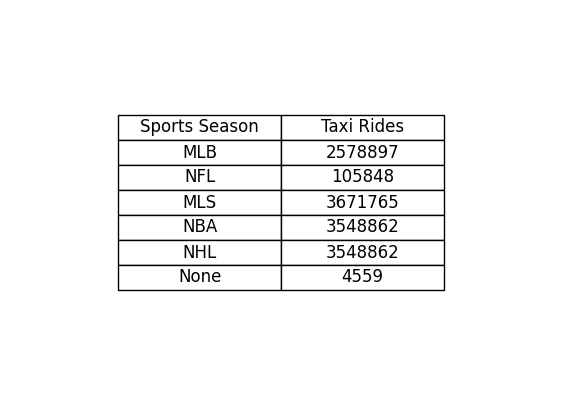

In [12]:
if data:
    # Initialize a defaultdict to count taxi rides by season
    season_counts = defaultdict(int)
    
    # Define start and end dates for each major sports season (recurring every year)
    seasons = {
        "NBA": {"start": (10, 1), "end": (4, 30)},
        "MLB": {"start": (3, 1), "end": (10, 31)},
        "NFL": {"start": (9, 1), "end": (12, 31)},
        "NHL": {"start": (10, 1), "end": (4, 30)},
        "MLS": {"start": (2, 1), "end": (12, 31)}
    }
    
    # Function to categorize a timestamp into sports seasons
    def categorize_season(timestamp):
        if timestamp:
            timestamp = datetime.strptime(timestamp, "%m/%d/%Y %I:%M:%S %p")
            matched_seasons = []
            for sport, dates in seasons.items():
                start_month, start_day = dates["start"]
                end_month, end_day = dates["end"]
                
                # Adjust the year for NHL and NBA if the timestamp falls after April
                if start_month > end_month and timestamp.month < start_month:
                    season_start = datetime(timestamp.year - 1, start_month, start_day)
                    season_end = datetime(timestamp.year, end_month, end_day)
                else:
                    season_start = datetime(timestamp.year, start_month, start_day)
                    season_end = datetime(timestamp.year, end_month, end_day)
                
                # Check if the timestamp falls within the season
                if season_start <= timestamp <= season_end:
                    matched_seasons.append(sport)
            if matched_seasons:
                return matched_seasons
        return ['None']  # Return 'None' if no sports season is matched

    # Sort the data by major sports seasons
    for record in data:
        seasons_matched = categorize_season(record["Trip Start Timestamp"])
        for season in seasons_matched:
            season_counts[season] += 1

    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(season_counts.keys(), season_counts.values())
    plt.xlabel("Sports Season")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Sports Season")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Create and display the table
    table_data = [['Sports Season', 'Taxi Rides']]
    for season, count in season_counts.items():
        table_data.append([season, count])
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
else:
    print("No data to visualize")

Sorting by Day of Week

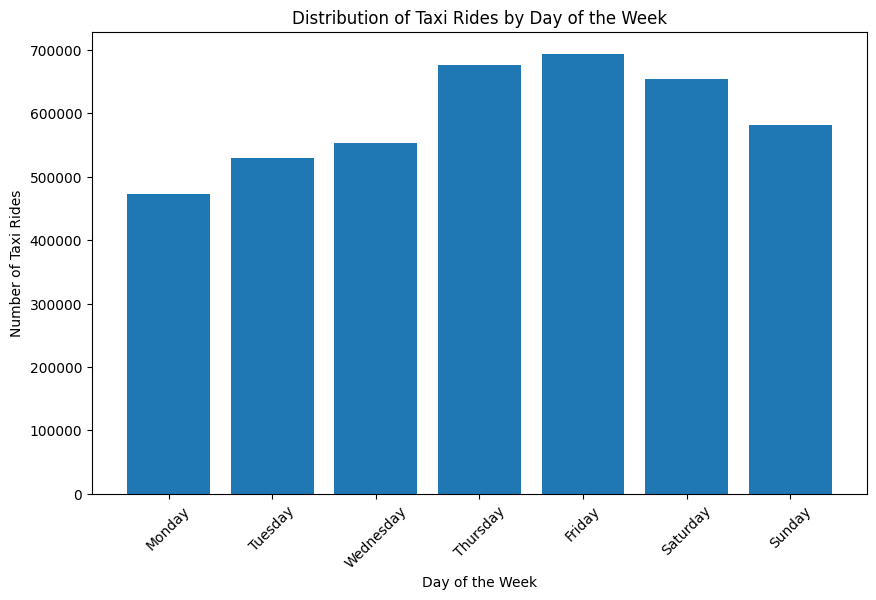

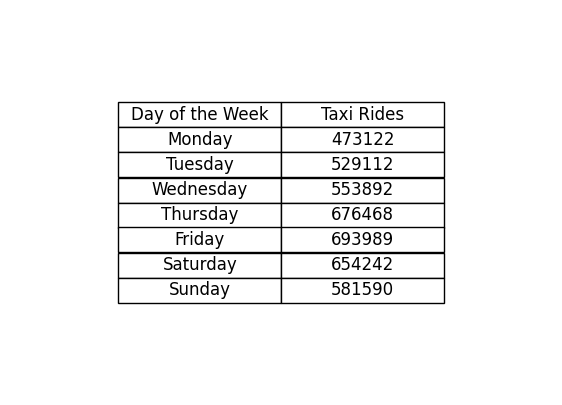

In [14]:
if data:
    # Initialize a defaultdict to count taxi rides by day of the week
    day_of_week_counts = defaultdict(int)
    
    # Function to categorize a timestamp into day of the week
    def categorize_day_of_week(timestamp):
        timestamp = datetime.strptime(timestamp, "%m/%d/%Y %I:%M:%S %p")
        return timestamp.strftime("%A")  # Return the full name of the day of the week
    
    # Sort the data by day of the week
    for record in data:
        day_of_week = categorize_day_of_week(record["Trip Start Timestamp"])
        day_of_week_counts[day_of_week] += 1
    
    # Plot the data as a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(day_of_week_counts.keys(), day_of_week_counts.values())
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Distribution of Taxi Rides by Day of the Week")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Create and display the table
    table_data = [['Day of the Week', 'Taxi Rides']]
    for day, count in day_of_week_counts.items():
        table_data.append([day, count])
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
else:
    print("No data to visualize")

Sorting by Top 20 Pickup Locations

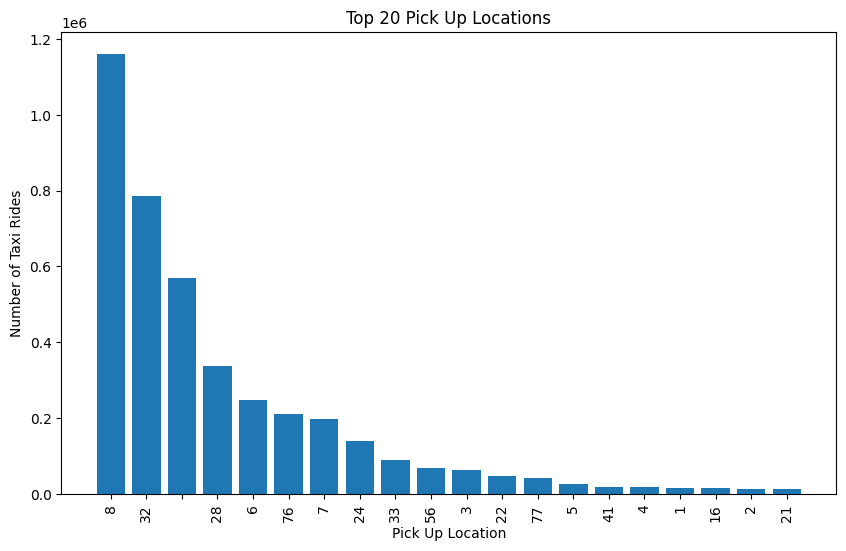

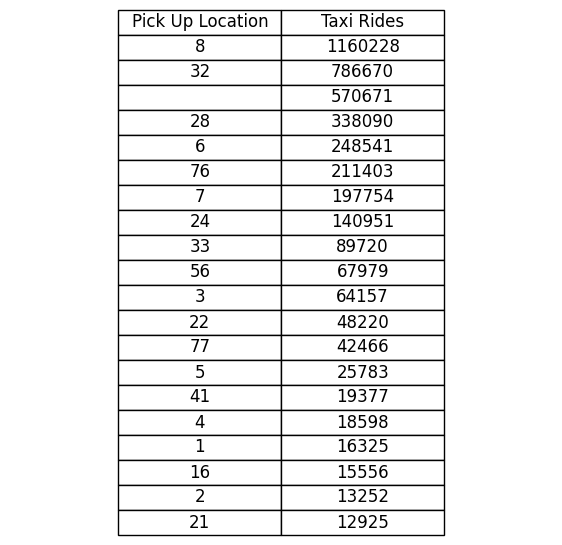

In [18]:
if data:
    # Initialize a defaultdict to count taxi rides by pick up location
    pickup_counts = defaultdict(int)
    
    # Function to categorize a trip by pick up location
    def categorize_pickup_location(pickup_location):
        return pickup_location
    
    # Sort the data by pick up location and count occurrences
    for record in data:
        pickup_location = record["Pickup Community Area"]
        pickup_counts[pickup_location] += 1
    
    # Sort the pickup counts dictionary by values in descending order
    sorted_pickup_counts = dict(sorted(pickup_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Select only the top 20 pick up locations
    top_20_pickup_locations = dict(list(sorted_pickup_counts.items())[:20])
    
    # Plot the data as a bar graph for top 20 pickup locations
    plt.figure(figsize=(10, 6))  # Adjust figsize as needed
    
    plt.bar(top_20_pickup_locations.keys(), top_20_pickup_locations.values())
    plt.xlabel("Pick Up Location")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Top 20 Pick Up Locations")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    plt.show()
    
    # Create and display the table
    table_data = [['Pick Up Location', 'Taxi Rides']]
    for location, count in top_20_pickup_locations.items():
        table_data.append([location, count])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")

Sorting by Top 20 Drop-Off Locations

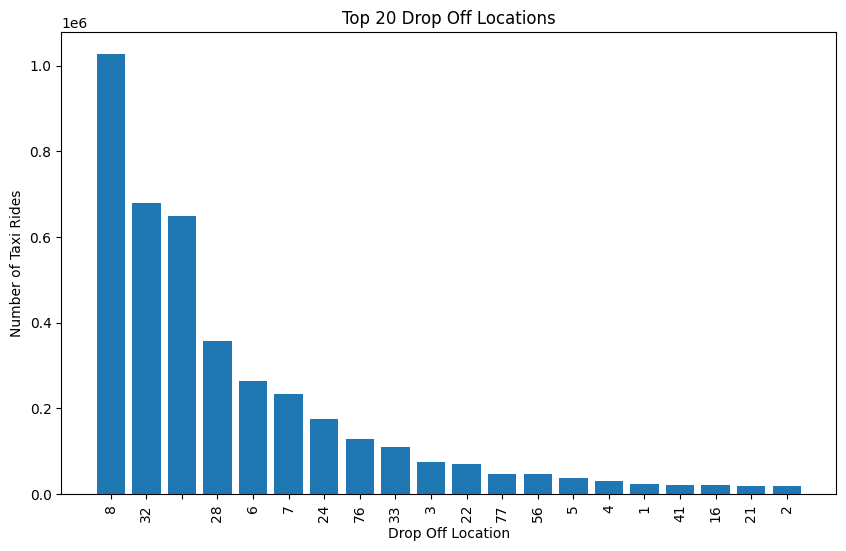

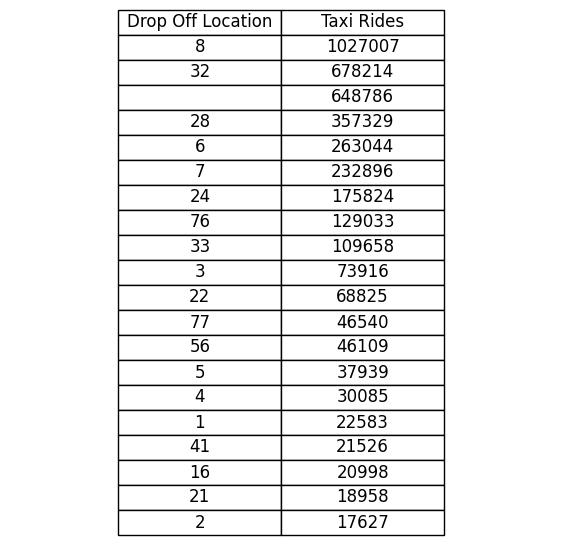

In [19]:
if data:
    # Initialize a defaultdict to count taxi rides by drop off location
    dropoff_counts = defaultdict(int)
    
    # Function to categorize a trip by drop off location
    def categorize_dropoff_location(dropoff_location):
        return dropoff_location
    
    # Sort the data by drop off location and count occurrences
    for record in data:
        dropoff_location = record["Dropoff Community Area"]
        dropoff_counts[dropoff_location] += 1
    
    # Sort the dropoff counts dictionary by values in descending order
    sorted_dropoff_counts = dict(sorted(dropoff_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Select only the top 20 drop-off locations
    top_20_dropoff_locations = dict(list(sorted_dropoff_counts.items())[:20])
    
    # Plot the data as a bar graph for top 20 drop-off locations
    plt.figure(figsize=(10, 6))  # Adjust figsize as needed
    
    plt.bar(top_20_dropoff_locations.keys(), top_20_dropoff_locations.values())
    plt.xlabel("Drop Off Location")
    plt.ylabel("Number of Taxi Rides")
    plt.title("Top 20 Drop Off Locations")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    # Create and display the table
    table_data = [['Drop Off Location', 'Taxi Rides']]
    for location, count in top_20_dropoff_locations.items():
        table_data.append([location, count])
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.axis('off')  # Turn off axis for the table
    
    # Create the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)  # Adjust table size
    
    plt.show()
    
else:
    print("No data to visualize")